# Hypothesis Testing Exercise

### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.


<strong>Note:</strong>
Remember the photo where we predicted if it was a cat or not.

H<sub>0</sub>: The photo is a cat.

<span style="color:green">The Photo is of a dog and the prediction is that it's not a cat.</span>

True Positive: H<sub>0</sub> is False, reject H<sub>0</sub>

<span style="color:green">The Photo is of a cat and the prediction is that it's a cat.</span>

True Negative: H<sub>0</sub> is True, accept the H<sub>0</sub>

<span style="color:red">The Photo is of a cat and the prediction is that it's not a cat.</span>

False Positive - Type I: H<sub>0</sub> is True , reject H<sub>0</sub> (reject null when null is true)

<span style="color:red">The Photo is of a dog and the prediction is that it's a cat.</span>

False Negative - Type II: H<sub>0</sub> is False, accept H<sub>0</sub>

### Has the network latency gone up since we switched internet service providers?

<span style="color:gray">
<strong>H<sub>0</sub>:</strong> There is no change in latency since switching internet service providers.

<strong>H<sub>A</sub>:</strong> There is and increase in latency since switching internet service providers.

<strong>True Positive:</strong> There is <strong>no change</strong> in latency, H<sub>0</sub> is <strong>accepted</strong>.

<strong>True Negative:</strong> There <strong>is</strong> a change in latency, H<sub>0</sub> is <strong>rejected</strong>.

<strong>Type I:</strong> There is <strong>no change</strong> in latency, but H<sub>0</sub> was <strong>rejected</strong>.

<strong>Type II:</strong> There <strong>is</strong> a change in latency, but H<sub>0</sub> is <strong>accepted</strong>.
</span>

### Is the website redesign any good?

<span style="color:gray">
<strong>H<sub>0</sub>:</strong>  There is no change in website sales after the redesign.

<strong>H<sub>A</sub>:</strong> There is an decrease in website sales since the redesign.

<strong>True Positive:</strong> There is <strong>no change</strong> in website sales, H<sub>0</sub> is <strong>accepted</strong>.

<strong>True Negative:</strong> There is an <strong>decrease</strong> in website sales, H<sub>0</sub> is <strong>rejected</strong>.

<strong>Type I:</strong> There is <strong>no change</strong> in website sales, but H<sub>0</sub> was <strong>rejected</strong>.

<strong>Type II:</strong> There is an <strong>decrease</strong> in website sales, but H<sub>0</sub> is <strong>accepted</strong>.
</span>

### Is our television ad driving more sales?

<span style="color:gray">
<strong>H<sub>0</sub>:</strong>  There is no difference in sales since the television ad aired.

<strong>H<sub>A</sub>:</strong>  There is an increase in sales since the television ad aired.

<strong>True Positive:</strong> There is <strong>no change</strong> in sales since the TV ad aired, H<sub>0</sub> is <strong>accepted</strong>.

<strong>True Negative:</strong> There is an <strong>increase</strong> in sales since the TV ad aired, H<sub>0</sub> is <strong>rejected</strong>.

<strong>Type I:</strong> There is <strong>no change</strong> in sales since the TV ad aired, but H<sub>0</sub> was <strong>rejected</strong>.

<strong>Type II:</strong> There is an <strong>increase</strong> in sales since the TV ad aired, but H<sub>0</sub> is <strong>accepted</strong>.
</span>

# T-Test Exercises

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from pydataset import data

In [2]:
# Gonna Play with this to make it more obvious if we reject or fail to reject the null hypothesis :)
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [3]:
# Office1: 40 sales, mean: 90 days, std: 15 days
# Office2: 50 sales, mean: 100 days, std: 20

alpha= 0.05

# H0: There is no difference in the time taken to sell homes between the two offices.
# Ha: There is a difference in the time taken to sell homes between the two offices.

# So this will be a two tailed test since we are looking for any difference.
# This is two samples from the same company, so I will use a 2-sample T-test
# scipy.stats.ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2, equal_var=True, alternative='two-sided')

office_compare = stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50, equal_var= False, alternative='two-sided')
# could also do: t, p = stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50, equal_var= False, alternative='two-sided')

p = office_compare[1]

if p < alpha:
    print(bcolors.OKGREEN + "We reject the null hypothesis" + bcolors.ENDC)

else:
    print(bcolors.FAIL + "We fail to reject the null hypothesis" + bcolors.ENDC)


We reject the null hypothesis


In [4]:
# The long way...
# Create my arrays
office1 = np.random.normal(90, 15, 40)
office2 = np.random.normal(100, 20, 50)


xbar1 = office1.mean()
xbar2 = office2.mean()

n1 = office1.size
n2 = office2.size

s1 = office1.std()
s2 = office2.std()

degf = n1 + n2 - 2

s_p = sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
s_p

standard_error = se = sqrt(s1**2 / n1 + s2**2 / n2)

t = (xbar1 - xbar2) / (s_p * sqrt(1/n1 + 1/n2))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test
t , p

(-1.9217924872959258, 1.942132066377849)

### Load the mpg dataset and use it to answer the following questions:

### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [5]:
df = data('mpg')

In [6]:
# I'm gonna create a column for avg milage and use this to determine fuel-efficiency
df = df.assign(avg_mileage = (df.hwy + df.cty) /2 )

In [7]:
# Now to create my array's
mileage_2008 = df[df.year == 2008].avg_mileage
milage_1999 = df[df.year == 1999].avg_mileage

# Check to see if variances are equal; they are not
# mileage_2008.var() , milage_1999.var()

# Define my hypothesis before testing:
# H0: There is no difference in fuel-efficiency between cars from 2008 vs 1999.
# Ha: There is a difference in fuel-efficiency between cars from 2008 vs 1999.

# This is a two-sampled, two-tailed test. 
t, p = stats.ttest_ind(mileage_2008, milage_1999, equal_var=False)
# t= -0.21960177245940962
# p= 0.8263750772060638

if p < alpha:
    print(bcolors.OKGREEN + "We reject the null hypothesis" + bcolors.ENDC)

else:
    print(bcolors.FAIL + "We fail to reject the null hypothesis" + bcolors.ENDC)

We fail to reject the null hypothesis


### Are compact cars more fuel-efficient than the average car?

In [8]:
# First to create my array's
# The data set doesn't have an "average" class of car, but it does have "midsize" so I'll use that
compact_mileage = df[df["class"] == "compact"].avg_mileage
midsize_milage = df[df["class"] == "midsize"].avg_mileage

# Check to see if variances are equal; they are not
# compact_mileage.var() , midsize_milage.var()

# Define my hypothesis before testing:
# H0: There is no difference in fuel-efficiency between compact cars and midsize cars.
# Ha: There is a difference in fuel-efficiency between compact cars and midsize cars.

# This is a two-sampled, two-tailed test. 
t, p = stats.ttest_ind(compact_mileage, midsize_milage, equal_var=False)
# t= 1.9869420198494934
# p= 0.050653659390104896

if p < alpha:
    print(bcolors.OKGREEN + "We reject the null hypothesis" + bcolors.ENDC)

else:
    print(bcolors.FAIL + "We fail to reject the null hypothesis" + bcolors.ENDC)


We fail to reject the null hypothesis


### Do manual cars get better gas mileage than automatic cars?

In [9]:
# Creating my array's
automatic_milage = df[df.trans.str.startswith("a")].avg_mileage
manual_milage = df[df.trans.str.startswith("m")].avg_mileage

# Check to see if variances are equal; they are not
# automatic_milage.var() , manual_milage.var()

# Define my hypothesis before testing:
# H0: Manual cars get <= gas mileage than automatic cars.
# Ha: Manual cars get > gas mileage than automatic cars.

# This is a two-sampled, one-tailed test (only want to know if > gas mileage) 
t, p = stats.ttest_ind(manual_milage, automatic_milage, equal_var=False)
t, p/2, alpha
# t= 4.443514012903071
# p/2= 8.976124499958965e-06

# For two-tailed tests we don't seem to check the T. However, in one-tailed tests, we see if t is > or < 0. 
# The direction of the equality sign for t looks to be determined by our Ha hypothesis. 
if (p/2 < alpha) & (t > 0):
    print(bcolors.OKGREEN + "We reject the null hypothesis" + bcolors.ENDC)

else:
    print(bcolors.FAIL + "We fail to reject the null hypothesis" + bcolors.ENDC)


We reject the null hypothesis


# Correlation Exercises

### Use the `telco_churn` data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

### Does tenure correlate with monthly charges? 

<strong>H<sub>0</sub>:</strong> There is no linear correlation between the tenure of customers and their monthly charges.

<strong>H<sub>a</sub>:</strong> There is a linear correlation between the tenure of customers and their monthly charges.

In [10]:
telco = pd.read_csv("telco_churn.csv")

# drop nulls
telco = telco.dropna()

#view data frame
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
# I have no idea what I'm doing~
corr, p = stats.pearsonr(telco.tenure, telco.MonthlyCharges)

corr , p

if p < alpha:
    print(bcolors.OKGREEN + "We reject the null hypothesis" + bcolors.ENDC)

else:
    print(bcolors.FAIL + "We fail to reject the null hypothesis" + bcolors.ENDC)

We reject the null hypothesis


Text(0, 0.5, 'Monthly Charges')

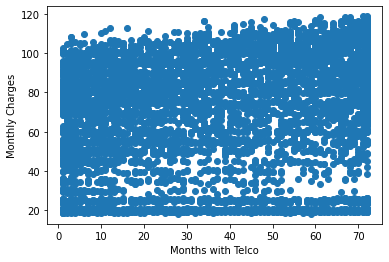

In [12]:
plt.scatter(telco.tenure,telco.MonthlyCharges)
plt.xlabel("Months with Telco")
plt.ylabel("Monthly Charges")

### Does tenure correlate with Total charges? 

<strong>H<sub>0</sub>:</strong> There is no linear correlation between the tenure of customers and their total charges.

<strong>H<sub>a</sub>:</strong> There is a linear correlation between the tenure of customers and their total charges.

In [13]:
corr, p = stats.pearsonr(telco.tenure, telco.TotalCharges)

corr, p

# corr: 0.825880460933202
# p: 0.0

if p < alpha:
    print(bcolors.OKGREEN + "We reject the null hypothesis" + bcolors.ENDC)

else:
    print(bcolors.FAIL + "We fail to reject the null hypothesis" + bcolors.ENDC)


We reject the null hypothesis


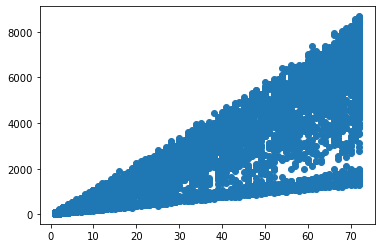

In [14]:
plt.scatter(telco.tenure,telco.TotalCharges);

### What happens if you control for phone and internet service?

<strong>H<sub>0</sub>:</strong> There is no linear correlation between the tenure of customers and their total charges.

<strong>H<sub>a</sub>:</strong> There is a linear correlation between the tenure of customers and their total charges.

In [15]:
telco[telco.InternetService != "No"].TotalCharges

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 5512, dtype: float64

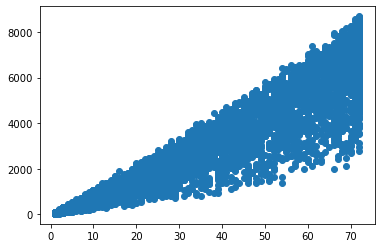

In [16]:
# create a function that will loop for all combinations, phone 0, phone 1, phone 2, no internet, dsl, fiberone, etc
plt.scatter(telco[telco.InternetService != "No"].tenure, telco[telco.InternetService != "No"].TotalCharges);

### Use the `employees` database.

### Is there a relationship between how long an employee has been with the company and their salary?


In [17]:
# This will be what I use every time I want to talk to a database in SQL
def get_db_url(database_name):
    from env import host, user, password
    return f'mysql+pymysql://{user}:{password}@{host}/{database_name}'

In [18]:
# length an employee has been with the company = min.From_date to max.to_date?

salaries = pd.read_sql("""SELECT * FROM salaries""" , get_db_url("employees"))
salaries["from_date"].astype(str)
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25


In [19]:
salaries.from_date[0]

datetime.date(1986, 6, 26)

In [20]:
DataFrame["from_date"].astype(str)

NameError: name 'DataFrame' is not defined

In [ ]:
df = df.assign(days_at_company = (df. + df.cty) /2 )

### Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [ ]:
salaries.info()

# Chi Squared Exercises

### 1. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

Form hypothesis:

<strong>H<sub>0</sub>:</strong> There is no association between using a macbook and being a codeup student.

<strong>H<sub>a</sub>:</strong> There is an association between using a macbook and being a codeup student.

In [21]:
# First to put the values from the contigency table on the curriculum into code
observed = pd.DataFrame([[49, 20], [1, 30]], index=["Uses a Macbook", "Doesn't Use A Macbook"], columns=["Codeup Student","Not Codeup Student"])
observed


,Codeup Student,Not Codeup Student
Uses a Macbook,49,20
Doesn't Use A Macbook,1,30


In [22]:
# Now for the magic to happen:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[49 20]
 [ 1 30]]
---
Expected

[[34.5 34.5]
 [15.5 15.5]]
---

chi^2 = 36.6526
p     = 0.0000


In [23]:
if p < alpha:
    print(bcolors.OKGREEN + "We reject the null hypothesis" + bcolors.ENDC)

else:
    print(bcolors.FAIL + "We fail to reject the null hypothesis" + bcolors.ENDC)


We reject the null hypothesis


### 2. Choose another 2 categorical variables from the `mpg` dataset and perform a <i>chi<sup>2</sup></i> contingency table test with them. Be sure to state your null and alternative hypotheses.

In [24]:
mpg = data('mpg')

In [25]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [33]:
mpg.drv.value_counts()

f    106
4    103
r     25
Name: drv, dtype: int64

Form hypothesis:

<strong>H<sub>0</sub>:</strong> The number of cylinders in a vehicle is independent from drive type.

<strong>H<sub>a</sub>:</strong> The number of cylinders in a vehicle is NOT independent from drive type.

In [45]:
# I'm not sure if this is okay. We didn't discuss in class more than 2x2
observed = pd.crosstab(mpg.cyl, mpg.drv)
observed

drv,4,f,r
cyl,,,
4,23,58,0
5,0,4,0
6,32,43,4
8,48,1,21


In [47]:
# Now for scipy to work it's magic~
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
if p < alpha:
    print(bcolors.OKGREEN + "We reject the null hypothesis" + bcolors.ENDC)

else:
    print(bcolors.FAIL + "We fail to reject the null hypothesis" + bcolors.ENDC)

#Chi is very high. Make sure to discuss with instructor

Observed

[[23 58  0]
 [ 0  4  0]
 [32 43  4]
 [48  1 21]]
---
Expected

[[35 36  8]
 [ 1  1  0]
 [34 35  8]
 [30 31  7]]
---

chi^2 = 98.1355
p     = 0.0000
We reject the null hypothesis


### 3. Use the data from the employees database to answer these questions:



In [35]:
employees = pd.read_sql(""" SELECT *
                            FROM employees
                            JOIN dept_emp using (emp_no) 
                            JOIN departments using (dept_no)
                            WHERE dept_emp.to_date > NOW();""" , 
                            get_db_url("employees")
                       )

### Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)


Form hypothesis:

<strong>H<sub>0</sub>:</strong> There is no association between employee gender and whether an employee works in sales or marketing.

<strong>H<sub>a</sub>:</strong> There is an association between employee gender and whether an employee works in sales or marketing.

In [40]:
# I'm gonna start by only looking at the departments I want, Sales and Marketing
sales_n_marketing= employees[employees.dept_name.isin(["Sales","Marketing"])]


In [41]:
# Then I'm gonna check to make sure my crosstab looks appropriate
observed = pd.crosstab(sales_n_marketing.gender , sales_n_marketing.dept_name)
observed


dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [44]:
# Now for scipy to work it's magic~
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
if p < alpha:
    print(bcolors.OKGREEN + "We reject the null hypothesis" + bcolors.ENDC)

else:
    print(bcolors.FAIL + "We fail to reject the null hypothesis" + bcolors.ENDC)


Observed

[[ 5864 14999]
 [ 8978 22702]]
---
Expected

[[ 5893 14969]
 [ 8948 22731]]
---

chi^2 = 0.3240
p     = 0.5692
We fail to reject the null hypothesis


### Is an employee's gender independent of whether or not they are or have been a manager?

Form Hypothesis:

<strong>H<sub>0</sub>:</strong> There is no association between employee gender and whether or not they are or have been a manager.

<strong>H<sub>0</sub>:</strong> There is an association between employee gender and whether or not they are or have been a manager.

In [48]:
managers = pd.read_sql("""  SELECT *
                            FROM employees
                            LEFT JOIN dept_manager using (emp_no)""" , 
                            get_db_url("employees")
                       )

In [49]:
# Make an is_manager column
managers.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,dept_no,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,None,None,None
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,None,None,None
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,None,None,None
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,None,None,None
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,None,None,None


In [ ]:
observed = pd.crosstab(managers.gender, managers.to_date.astype(str).str.startswith("9999"))
observed

In [ ]:
managers.to_date.astype(str).str.startswith("9999")